In [1]:
import numpy as np
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN


In [2]:
def extract_faces(input_file, min_confidence=0.9, crop=True):
    # Load the image and orient it correctly
    pil_image = Image.open(input_file)
    exif = pil_image.getexif()
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
        pil_image.info["exif"] = exif.tobytes()
        pil_image = ImageOps.exif_transpose(pil_image)
        image = np.array(pil_image)
        
        # Find the faces in the image
        detector = MTCNN()
        faces = detector.detect_faces(image)
        faces = [face for face in faces if face['confidence'] >= min_confidence]
        results = []
        
        for face in faces:
            x1, y1, w, h = face['box']
            
            if (crop):
                # Compute crop coordinates
                if w > h:
                    x1 = x1 + ((w - h) // 2)
                    w = h
                elif h > w:
                    y1 = y1 + ((h - w) // 2)
                    h = w
                    
            # Extract the facial image and add it to the list
            x2 = x1 + w
            y2 = y1 + h
            results.append(Image.fromarray(image[y1:y2, x1:x2]))
        # Return all the facial images
        return results


4/4 [==============================] - 0s 22ms/step


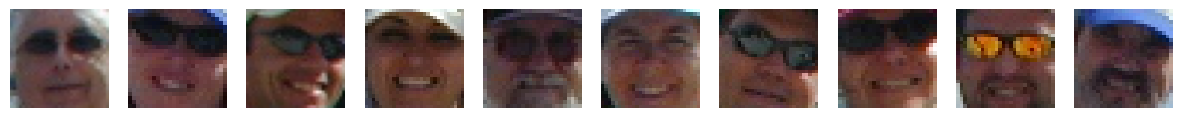

In [7]:
# Extract faces from the image
faces = extract_faces('cruise.jpg')

# Plot the faces without saving them
num_faces = len(faces)  # Number of faces extracted

fig, axes = plt.subplots(1, num_faces, figsize=(15, 5))

for i in range(num_faces):
    axes[i].imshow(faces[i])
    axes[i].axis('off')  # Hide the axes

plt.show()